# Interpolation

Interpolation is a method of constructing new data points within the range of a discrete set of known data points.

<img src="img/points.png",width=250,height=250>

## 1) Nearest-Neighbor Interpolation

The simplest interpolation method is to locate the nearest data value, and assign the same value. 
In simple problems, this method is unlikely to be used, as linear interpolation is almost as easy, but in higher-dimensional multivariate interpolation, this could be a favourable choice for its speed and simplicity.

<img src="img/nearest.png",width=250,height=250>

## 2) Linear Interpolation

New data points are constructed using linear interpolants.

#### Between two known points

If the two known points are given by the coordinates $(x_0,y_0)$, $(x_1,y_1)$ , the linear interpolant is the straight line between these points. For a value x in the interval $(x_0,x_1)$, the value y along the straight line is given from the equation $\frac{y-y_0}{x-x_0}=\frac {y_{1}-y_{0}}{x_{1}-x_{0}}$ which can be derived geometrically from the figure below.

<img src="img/linear.png",width=250,height=250>

Solving this equation for y, which is the unknown value at x, gives 

\begin{equation}
y=y_0+(x-x_0)\frac {y_1-y_0}{x_1-x_0}
\end{equation}

which is the formula for linear interpolation in the interval $(x_0,x_1)$. 

#### For a data set

Linear interpolation on a set of data points $(x_0, y_0), (x_1, y_1),\ldots, (x_n, y_n)$ is defined as the concatenation of linear interpolants between each pair of data points. 

<img src="img/linear2.png",width=250,height=250>

#### Disadvantages:

1) Discontinuous derivative (in general) with the interpolant not differentiable at known points.

2) Not smooth enough



## 3) Polynomial Interpolation

The interpolant now is a polynomial of higher degree. Given some points, find a polynomial which goes exactly through these points.

Linear interpolation was a special case of polynomial interpolation with n = 1


Given a set of $n+1$ data points $(x_i, y_i)$ where no two $x_i$ are the same, one is looking for a polynomial $p$ of degree at most $n$ with the property $p(x_i)=y_i,\qquad i=0,\ldots,n$.


Suppose that the interpolation polynomial is in the form

\begin{equation}
p(x)=a_n x^n+a_{n-1}x^{n-1}+\cdots +a_2x^2+a_1x+a_0 
\end{equation}

The statement that p interpolates the data points means that  

\begin{equation}
p(x_i)=y_i\qquad {\mbox{for all }}i\in \left\{0,1,\dots ,n\right\}
\end{equation}

If we combine these two equations, we get a system of linear equations in the coefficients $\alpha_i$. The system in matrix-vector form reads

\begin{equation}
\begin{bmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & \ldots & x_0 & 1 \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & \ldots & x_1 & 1 \\
\vdots & \vdots    & \vdots    &        & \vdots & \vdots \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & \ldots & x_n & 1
\end{bmatrix}
\begin{bmatrix} a_n \\ a_{n-1} \\ \vdots \\ a_0 \end{bmatrix}  =
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}
\end{equation}

We have to solve this system for $\alpha_i$ to construct the interpolant $p(x)$.
Or alternatively write down the polynomial immediately in terms of Lagrange polynomials.


Generally, if we have n data points, there is exactly one polynomial of degree at most n−1 going through all the data points. The interpolation error is proportional to the distance between the data points to the power n. Furthermore, the interpolant is a polynomial and thus infinitely differentiable. Therefore, polynomial interpolation overcomes most of the problems of linear interpolation.


#### Disadvantages

1) Computationally expensive compared to linear interpolation

2) May exhibit oscillatory artifacts especially at the end points (Runge's phenomenon).


<img src="img/polynomial.png",width=350,height=350>



## 4) Spline Interpolation
 
Spline interpolation uses low-degree polynomials in each of the intervals $(x_i,x_{i+1})$, and chooses the polynomial pieces such that they fit smoothly together. Namely that there is no discontinuity at the interval boundaries. When one uses polynomials of third degree we have the case of cubic spline interpolation.

An example for the points in the first figure is using the natural cubic spline which is piecewise cubic and twice continuously differentiable. Also its second derivative is zero at the end points:


$f(x)={\begin{cases}-0.1522x^{3}+0.9937x,&{\text{if }}x\in [0,1],\\-0.01258x^{3}-0.4189x^{2}+1.4126x-0.1396,&{\text{if }}x\in [1,2],\\0.1403x^{3}-1.3359x^{2}+3.2467x-1.3623,&{\text{if }}x\in [2,3],\\0.1579x^{3}-1.4945x^{2}+3.7225x-1.8381,&{\text{if }}x\in [3,4],\\0.05375x^{3}-0.2450x^{2}-1.2756x+4.8259,&{\text{if }}x\in [4,5],\\-0.1871x^{3}+3.3673x^{2}-19.3370x+34.9282,&{\text{if }}x\in [5,6].\end{cases}}$



#### Advantages

1) Smaller error  and smoother interpolant than linear interpolation

2) Interpolant is easier to evaluate than the high-degree polynomials used in polynomial interpolation. 

3) Does not suffer from oscillatory artifacts at the end points. 














In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
import numpy as np                                                              #
import matplotlib.pyplot as plt                                                 #
from scipy import interpolate                                                   #
from scipy.ndimage import map_coordinates                                       #
import matplotlib.pyplot as plt                                                 #
import matplotlib.ticker as ticker                                              #
from mpl_toolkits.axes_grid1 import make_axes_locatable                         #
import matplotlib                                                               #
from matplotlib import ticker                                                   #
tick_locator = ticker.MaxNLocator(nbins=4)                                      #
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter               #
from pylab import *                                                             #
from matplotlib.ticker import MultipleLocator                                   #
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid              #
import matplotlib.gridspec as gridspec                                          #
from scipy import stats                                                         #
from astroML.plotting import hist                                               #
                                                                                #
                                                                                #
plt.rcParams.update({'font.size': 15})                                          #  
matplotlib.rcParams['pdf.fonttype'] = 42                                        #
plt.rcParams['ps.fonttype'] = 42                                                #
                                                                                #
from skimage.transform import rotate                                            #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
                                                                   
%matplotlib inline


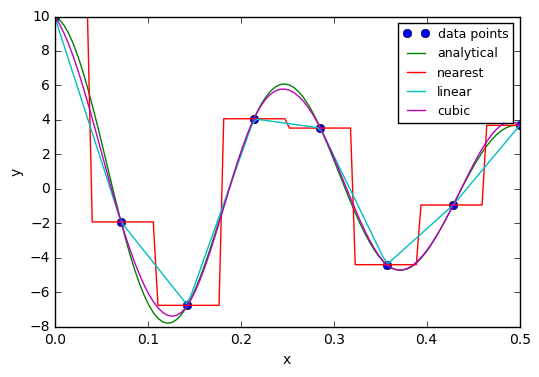

In [2]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#              Generate some 1D data and plot them                              #
A, nu, k = 10, 4, 2                                                             #
                                                                                #
#                      analytical function chosen                               #
def f(x, A, nu, k):                                                             #
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)                          #
                                                                                #
#               calculate just a few values somewhere                           #
xmax, nx = 0.5, 8                                                               #
x = np.linspace(0, xmax, nx)                                                    #
y = f(x, A, nu, k)                                                              #
                                                                                #
#         From these points define 3 different interpolating function           #
f_nearest = interpolate.interp1d(x, y, kind='nearest')                          #
f_linear  = interpolate.interp1d(x, y, kind='linear')                           #
f_cubic   = interpolate.interp1d(x, y, kind='cubic')                            #
                                                                                #
                                                                                #
#            Now define new data points where you want values                   #
#                      and plot everything                                      #
x2 = np.linspace(0, xmax, 100)                                                  #
plt.plot(x, y, 'o', label='data points')                                        #
plt.plot(x2, f(x2, A, nu, k), label='analytical')                               #
plt.plot(x2, f_nearest(x2), label='nearest')                                    #
plt.plot(x2, f_linear(x2), label='linear')                                      #
plt.plot(x2, f_cubic(x2), label='cubic')                                        #
plt.legend(loc="upper right", prop={'size':9})                                  #
plt.xlabel("x")                                                                 #
plt.ylabel("y")                                                                 #
plt.show()                                                                      #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

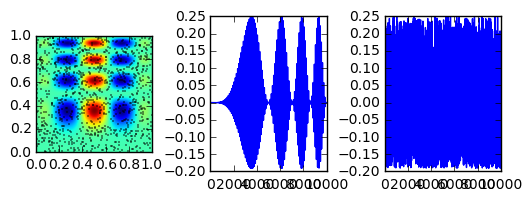

In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#              Now generate some 2D data                                        #
def func(x, y):                                                                 #
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2                  #
                                                                                #
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]                                   #
points = np.random.rand(1000, 2)                                                #
values = func(points[:,0], points[:,1])                                         #
image=func(grid_x, grid_y).T                                                    #
imvals=image.flatten()                                                          #
grid_x1D, grid_y1D =grid_x.flatten(), grid_y.flatten()                          #
perm = permutation(len(imvals))                                                 #
grid_x1Dp, grid_y1Dp=grid_x1D[perm], grid_y1D[perm]                             #
                                                                                #
gs = gridspec.GridSpec(1, 3, height_ratios=[1,1], wspace=0.5)                   #
ax = plt.subplot(gs[0])                                                         #
                                                                                #
ax1=plt.subplot(gs[0])                                                          #
ax2=plt.subplot(gs[1])                                                          #
ax3=plt.subplot(gs[2])                                                          #
ax1.imshow(image, extent=(0,1,0,1), origin='lower')                             #
ax1.plot(points[:,0], points[:,1], 'k.', ms=1)                                  #
                                                                                #
ax2.plot(imvals)                                                                #
ax3.plot(imvals[perm])                                                          #
plt.show()                                                                      #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

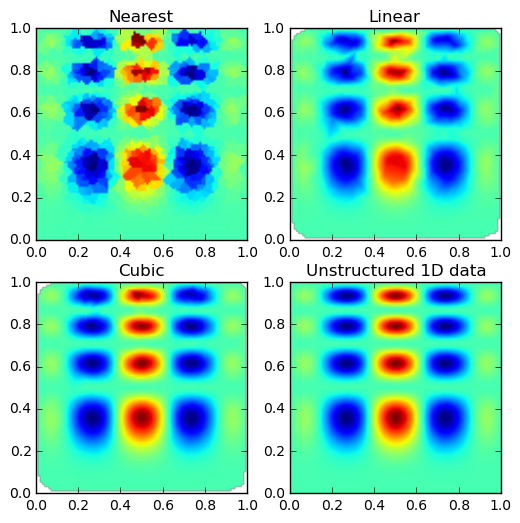

In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#               Now go ahead and reconstruct unstructured data and              #
#                       shuufled structured data                                #
grid_z0 = interpolate.griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = interpolate.griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = interpolate.griddata(points, values, (grid_x, grid_y), method='cubic')#
                                                                                #
#                           Unstructured data                                   #
grid_z3 = interpolate.griddata((grid_x1Dp, grid_y1Dp), imvals[perm], (grid_x, grid_y), method='cubic')
plt.subplot(221)                                                                #
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')                         #
plt.title('Nearest')                                                            #
plt.subplot(222)                                                                #
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')                         #
plt.title('Linear')                                                             #
plt.subplot(223)                                                                #
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')                         #
plt.title('Cubic')                                                              #
plt.subplot(224)                                                                #
plt.title('Unstructured 1D data')                                               #
plt.imshow(zip(*grid_z3.T), extent=(0,1,0,1), origin='lower')                   #
plt.gcf().set_size_inches(6, 6)                                                 #
plt.show()                                                                      #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

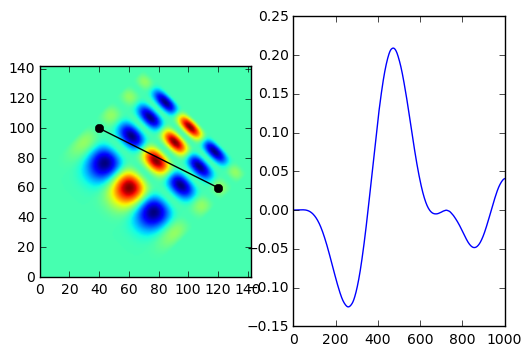

In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#           Now rotate image (matrix) and take diagonal cuts & all              #
rotated=rotate(image, 45, resize=True)                                          #
x0, y0 = 40, 100 # These are in _pixel_ coordinates!!                           #
x1, y1 = 120, 60                                                                #
num = 1000                                                                      #
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)                       #
zi = map_coordinates(rotated, np.vstack((x,y)))  #3rd order spline interpolation#
f, (ax1, ax2) = plt.subplots(1, 2)                                              #
ax1.imshow(rotated)                                                             #
ax1.plot([x0, x1], [y0, y1], 'ko-')                                             #
ax1.set_xlim(0, len(rotated[0]))                                                #
ax1.set_ylim(0, len(rotated))                                                   #
ax2.plot(zi)                                                                    #
plt.show()                                                                      #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

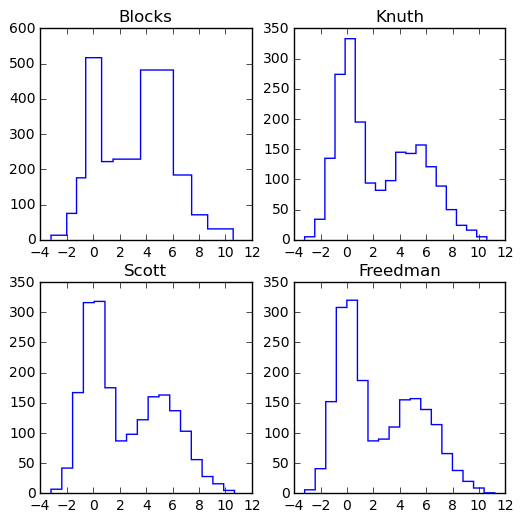

In [6]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#      The question we were all been asking: How do I plot my histogram?        #
#                         What bin size is the best??                           #
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -#
#                               Create data                                     #
rng = np.random.RandomState(10)  # deterministic random data                    #
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))   #
                                                                                #
plt.subplot(221)                                                                #
hist(a, histtype='step', bins='blocks')                                         #
plt.title('Blocks')                                                             #
plt.subplot(222)                                                                #
hist(a, histtype='step', bins='knuth')                                          #
plt.title('Knuth')                                                              #
plt.subplot(223)                                                                #
hist(a, histtype='step', bins='scott')                                          #
plt.title('Scott')                                                              #
plt.subplot(224)                                                                #
plt.title('Freedman')                                                           #
hist(a, histtype='step', bins='freedman')                                       #
plt.gcf().set_size_inches(6, 6)                                                 #
                                                                                #
plt.show()                                                                      #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

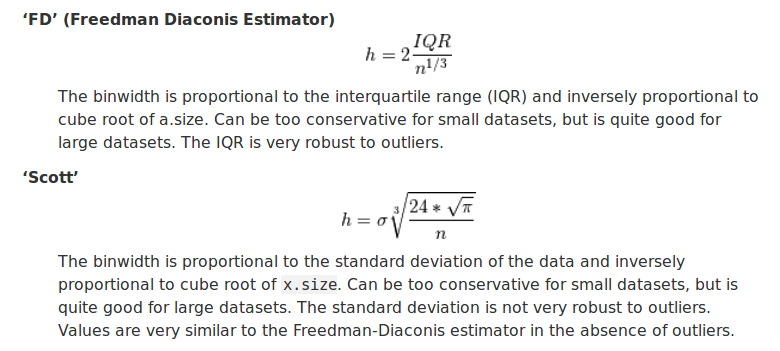

In [7]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
from IPython.display import Image                                               #
Image("histBintypes.png")                                                       #
#                                                                               #
# IQR --> also called the midspread or middle 50%, or technically H-spread,     #
#   is a measure of statistical dispersion, being equal to the difference       #
#  between 75th and 25th percentiles, or between upper and lower quartiles      #
#                            IQR = Q3 −  Q1                                     #
#        in terms of the CDF, the quartiles can be defined as follows:          #
#                Q1 = CDF^(-1)(0.25)      Q3 = CDF^(-1)(0.75)                   #
#                                                                               #
#                                                                               #
#                             Blocks--> Bayesian based                          #
#                                                                               #
#            "Problems addressed include those connected with data gaps,        #
#   variable exposure, extension to piece-wise linear and piecewise exponential #
#       representations, multi-variate time series data, analysis of variance,  #
#             data on the circle, other data modes,and dispersed data"          #
#                          https://arxiv.org/pdf/1207.5578.pdf                  #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

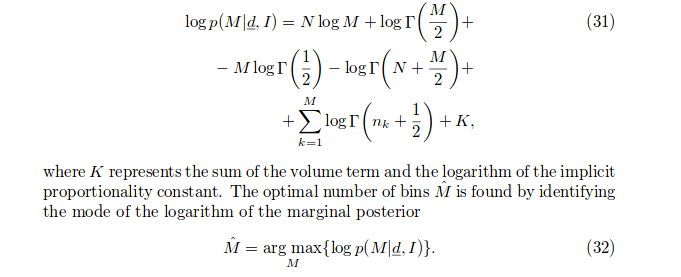

In [8]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#                                                                               #
#                          knuth's rule--> Bayesian based                       #
#                                                                               #
#      By assigning a multinomial likelihood and a non-informative prior,       #
#         we derive the posterior probability for the number of bins in         #
#              a piecewise-constant density model given the data                #
#                          https://arxiv.org/abs/physics/0605197                #
Image("knuth1.png")                                                             #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

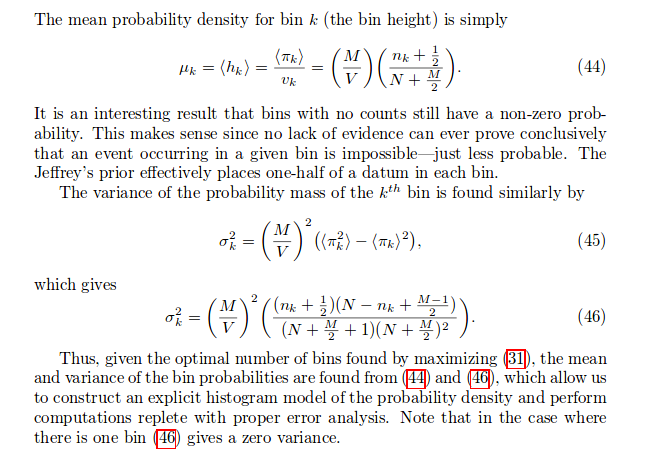

In [9]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
Image("knuth2.png")                                                             #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

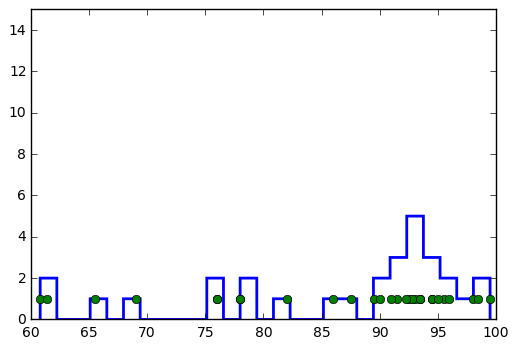

None

In [10]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#       "kernel density estimation (KDE) is a non-parametric way to estimate    #
#      the probability density function of a random variable. Kernel density    #
#      estimation is a fundamental data smoothing problem where inferences      #
#       about the population are made, based on a finite data sample"           #
#                                                                               #
#   Two of the main problems with histograms are (1) you need to define a       #
#      bin size (2) you need to decide where the left edge of the bin is.       #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
from IPython import display                                                     #
import time                                                                     #
data = np.array((93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,#
                 89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61.4,96,90))      #
                                                                                #
for i in range (5, len(data), 2):                                               #
    plt.hist(data, histtype="step", bins=i, linewidth=2., color='b')            #
    plt.plot(data, np.ones(len(data)), "go")                                    #
    plt.ylim(0, 15)                                                             # 
    display.clear_output(wait=True)                                             #
    display.display(plt.gcf())                                                  #
    display.display(plt.clf())                                                  #
    time.sleep(1.5)                                                             #
                                                                                #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

In [11]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
#  The basic idea is that, if you're looking at our simple dataset              #
#  (simple_data = array((0,5,10)), you might choose to represent each point     #
#   as a rectangle. Not so interesting so far, but what do we do when the       #
#  rectangles get wide enough that they start to overlap? Instead of just       #
#   letting them run over each other like and instead of coloring the overlap   #
#   regions darker grey, we add the rectangles together. So, since each of the  #
#  rectangles has height 0.5 in the above example, the dark grey regions should #
#  really have height 1.0. This idea is called "kernel density estimation" (KDE)#
# and the rectangle that we're using is called the "kernel". If we wanted to    #
#   draw a different shape at each point, we'd do so by specifying a different  #
#           kernel (perhaps a bell curve, or a triangle).                       #
#                                                                               #          
# Making the kernel too narrow doesn't provide much more information than the   #
#   raw data, while making it too large oversmooths the data, making it mostly  #
#          look like a single kernel with some bits on the sides.               #
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


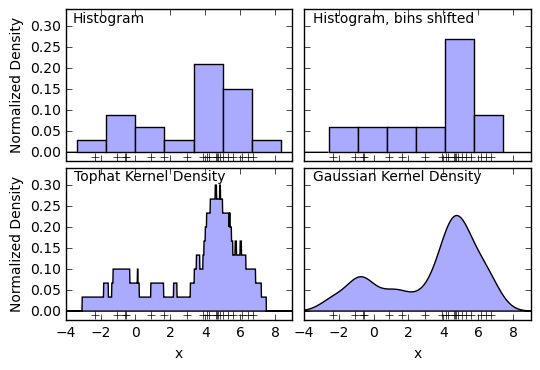

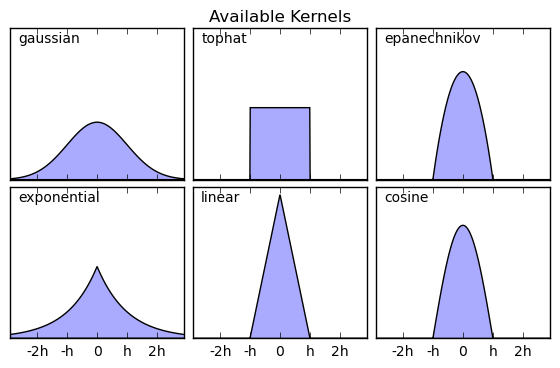

In [12]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

#----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')
plt.show()